In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import math
from scipy import stats
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('NoteBooks-Statistics-and-MachineLearning-master/data/klout-scores.csv', header = None, names = ['scores'])

In [3]:
data.head()

,scores
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690


In [4]:
data.tail()

,scores
1043,28.544280
1044,16.647022
1045,40.078943
1046,51.085002
1047,22.430099


In [5]:
data.describe()

,scores
count,1048.000000
mean,37.719055
std,16.044315
min,10.000000
25%,23.174620
50%,41.094683
75%,50.284432
max,87.247529


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 1 columns):
scores    1048 non-null float64
dtypes: float64(1)
memory usage: 8.3 KB


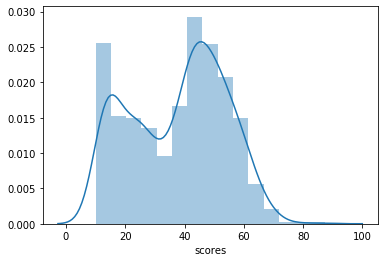

In [7]:
p = sns.distplot(data.scores)

In [8]:
len(data)

1048

In [9]:
n = data.scores.count()
confidence_coef = 0.95
alpha = 1.0 - confidence_coef

###  What Is Confidence Interval?
```
A confidence interval, in statistics, refers to the probability that a population parameter will fall between two set values for a certain proportion of times. Confidence intervals measure the degree of uncertainty or certainty in a sampling method. A confidence interval can take any number of probabilities, with the most common being a 95% or 99% confidence level.

```( পরিসংখ্যানগুলিতে একটি আত্মবিশ্বাসের ব্যবধানটি একটি নির্দিষ্ট অনুপাতের জন্য একটি জনসংখ্যার প্যারামিটার দুটি সেট মানের মধ্যে পড়ার সম্ভাবনা বোঝায়। আত্মবিশ্বাসের বিরতি একটি নমুনা পদ্ধতিতে অনিশ্চয়তা বা নিশ্চিততার ডিগ্রি পরিমাপ করে। একটি আত্মবিশ্বাসের ব্যবধানটি বেশিরভাগ সংখ্যক সম্ভাব্যতা নিতে পারে, যার মধ্যে 95% বা 99% আস্থা স্তর থাকে common )```

 Confidence interval and confidence level are interrelated but are not exactly the same.
Understanding Confidence Interval
Statisticians use confidence intervals to measure uncertainty(অনিশ্চয়তা). For example, a researcher selects different samples randomly from the same population and computes a confidence interval for each sample. The resulting datasets are all different; some intervals include the true population parameter and others do not.
```( আত্মবিশ্বাসের বিরতি এবং আত্মবিশ্বাসের স্তর আন্তঃসম্পর্কিত তবে একেবারে এক নয়। কনফিডেন্স ইন্টারভেল বোঝা tanding পরিসংখ্যানবিদরা অনিশ্চয়তা পরিমাপ করতে আত্মবিশ্বাসের ব্যবধানগুলি ব্যবহার করেন (অনিশ্চিততা)। উদাহরণস্বরূপ, একজন গবেষক একই জনসংখ্যার থেকে এলোমেলোভাবে বিভিন্ন নমুনা নির্বাচন করেন এবং প্রতিটি নমুনার জন্য একটি আস্থার ব্যবধান গণনা করেন। ফলস্বরূপ ডেটাসেটগুলি সমস্ত পৃথক; কিছু ব্যবধানে সত্যিকারের জনসংখ্যার প্যারামিটার অন্তর্ভুক্ত থাকে এবং অন্যেরা তা করে না। )```


A Confidence interval is a range of values that likely would contain an unknown population parameter. Confidence level refers to the percentage of probability, or certainty, that the confidence interval would contain the true population parameter when you draw a random sample many times. Or, in the vernacular, "We are 99% certain (confidence level) that most of these datasets (confidence intervals) contain the true population parameter."

```( একটি আত্মবিশ্বাস বিরতি হল মানগুলির একটি ব্যাপ্তি যা সম্ভবত অজানা জনসংখ্যার প্যারামিটার ধারণ করে। আত্মবিশ্বাসের স্তরটি সম্ভাবনার শতাংশ বা নিশ্চিততার সাথে বোঝায় যে আপনি যখন অনেকবার এলোমেলো নমুনা আঁকেন তখন আত্মবিশ্বাসের ব্যবধানটি সত্যিকারের জনসংখ্যার পরামিতি ধারণ করে। অথবা, স্থানীয় ভাষায়, "আমরা 99% নির্দিষ্ট (আত্মবিশ্বাসের স্তর) যে এই বেশিরভাগ ডেটাসেটগুলিতে (আত্মবিশ্বাসের অন্তর) সত্যিকারের জনসংখ্যার প্যারামিটার ধারণ করে" )```

KEY TAKEAWAYS
A confidence interval calculates the probability that a population parameter will fall between two set values.
Confidence intervals measure the degree of uncertainty or certainty in a sampling method.
Most often, confidence intervals reflect confidence levels of 95% or 99%.
Calculating a Confidence Interval

```( একটি আত্মবিশ্বাসের ব্যবধান এমন সম্ভাবনা গণনা করে যে জনসংখ্যা প্যারামিটার দুটি সেট মানের মধ্যে পড়বে। আত্মবিশ্বাসের বিরতি একটি নমুনা পদ্ধতিতে অনিশ্চয়তা বা নিশ্চিততার ডিগ্রি পরিমাপ করে। প্রায়শই আত্মবিশ্বাসের ব্যবধানগুলি 95% বা 99% এর আত্মবিশ্বাসের স্তরকে প্রতিবিম্বিত করে। একটি আত্মবিশ্বাসের ব্যবধান গণনা করা )```

Suppose a group of researchers is studying the heights of high school basketball players. The researchers take a random sample from the population and establish a mean height of 74 inches. The mean of 74 inches is a point estimate of the population mean. A point estimate by itself is of limited usefulness because it does not reveal the uncertainty associated with the estimate; you do not have a good sense of how far away this 74-inch sample mean might be from the population mean. What's missing is the degree of uncertainty in this single sample.

```( মনে করুন একদল গবেষক উচ্চ বিদ্যালয়ের বাস্কেটবল খেলোয়াড়ের উচ্চতা অধ্যয়ন করছে। গবেষকরা জনসংখ্যার থেকে এলোমেলো নমুনা নেন এবং গড় উচ্চতা inches৪ ইঞ্চি স্থাপন করেন। জনসংখ্যার গড় of৪ ইঞ্চি গড়ের বিন্দু অনুমান। নিজেই একটি পয়েন্ট অনুমান সীমিত উপযোগিতা কারণ এটি অনুমানের সাথে সম্পর্কিত অনিশ্চয়তা প্রকাশ করে না; এই 74 ইঞ্চির নমুনাটি জনসংখ্যার দিক থেকে কতটা দূরে থাকতে পারে তার কোনও ধারণা আপনার নেই sense যা অনুপস্থিত তা হ'ল এই একক নমুনায় অনিশ্চয়তার ডিগ্রি। )```

Confidence intervals provide more information than point estimates. By establishing a 95% confidence interval using the sample's mean and standard deviation, and assuming a normal distribution as represented by the bell curve, the researchers arrive at an upper and lower bound that contains the true mean 95% of the time. Assume the interval is between 72 inches and 76 inches. If the researchers take 100 random samples from the population of high school basketball players as a whole, the mean should fall between 72 and 76 inches in 95 of those samples.

```( আত্মবিশ্বাসের বিরতিগুলি বিন্দু অনুমানের চেয়ে বেশি তথ্য সরবরাহ করে। নমুনার গড় এবং মানক বিচ্যুতি ব্যবহার করে 95% আত্মবিশ্বাসের ব্যবধান স্থাপন করে এবং বেল বক্ররেখার প্রতিনিধিত্ব করে একটি সাধারণ বন্টন ধরে নিয়ে গবেষকরা একটি উপরের এবং নিম্ন সীমানায় পৌঁছান যেখানে সময়টির প্রকৃত গড় 95% থাকে contains ধরুন ব্যবধানটি 72 ইঞ্চি থেকে 76 ইঞ্চির মধ্যে রয়েছে। গবেষকরা সামগ্রিকভাবে যদি উচ্চ বিদ্যালয়ের বাস্কেটবল খেলোয়াড়ের জনসংখ্যা থেকে 100 টি এলোমেলো নমুনা নেন তবে সেই নমুনাগুলির 95 টির মধ্যে গড় 72 বা 76 ইঞ্চির মধ্যে পড়তে হবে। )```

If the researchers want even greater confidence, they can expand the interval to 99% confidence. Doing so invariably creates a broader range, as it makes room for a greater number of sample means. If they establish the 99% confidence interval as being between 70 inches and 78 inches, they can expect 99 of 100 samples evaluated to contain a mean value between these numbers. A 90% confidence level means that we would expect 90% of the interval estimates to include the population parameter. Likewise, a 99% confidence level means that 95% of the intervals would include the parameter.

```( গবেষকরা যদি আরও বৃহত্তর আত্মবিশ্বাস চান তবে তারা ব্যবধানটি 99% আত্মবিশ্বাসে প্রসারিত করতে পারেন। এটি অবিচ্ছিন্নভাবে একটি বিস্তৃত পরিসীমা তৈরি করে, কারণ এটি আরও বেশি সংখ্যক নমুনার মাধ্যমের জায়গা করে দেয়। যদি তারা inches০ ইঞ্চি থেকে inches 78 ইঞ্চির মধ্যে 99% আত্মবিশ্বাসের ব্যবধানটি স্থাপন করে তবে তারা এই সংখ্যার মধ্যে গড় মূল্য রাখতে 100 টি নমুনা মূল্যায়ন করতে পারে। একটি 90% আত্মবিশ্বাসের স্তরটির অর্থ আমরা জনসংখ্যার প্যারামিটারকে অন্তর্ভুক্ত করার 90% ব্যবধানের অনুমানের আশা করব। তেমনিভাবে, একটি 99% আত্মবিশ্বাস স্তর মানে 95% অন্তরগুলি প্যারামিটার অন্তর্ভুক্ত করবে। )```


Common Misconceptions About Confidence Interval
The biggest misconception regarding confidence intervals is that they represent the percentage of data from a given sample that falls between the upper and lower bounds. For example, one might erroneously interpret the aforementioned 99% confidence interval of 70-to-78 inches as indicating that 99% of the data in a random sample falls between these numbers. This is incorrect, though a separate method of statistical analysis exists to make such a determination. Doing so involves identifying the sample's mean and standard deviation and plotting these figures on a bell curve.
```( আত্মবিশ্বাসের ব্যবধান সম্পর্কে সাধারণ ভুল ধারণা আত্মবিশ্বাসের ব্যবধানগুলি সম্পর্কে সবচেয়ে বড় ভুল ধারণাটি হ'ল যে তারা একটি প্রদত্ত নমুনা থেকে প্রাপ্ত ডেটা শতাংশের প্রতিনিধিত্ব করে যা উপরের এবং নিম্ন সীমার মধ্যে পড়ে। উদাহরণস্বরূপ, কেউ 70০ থেকে 78 78 ইঞ্চির উপরের উল্লিখিত 99% আত্মবিশ্বাসের ব্যবধানকে ভুল করে ব্যাখ্যা করতে পারে যে ইঙ্গিত দেয় যে এলোমেলো নমুনায় থাকা 99% তথ্য এই সংখ্যার মধ্যে পড়ে। এটি ভুল, যদিও এই জাতীয় সংকল্প করার জন্য পরিসংখ্যান বিশ্লেষণের একটি পৃথক পদ্ধতি বিদ্যমান। এটি করার মধ্যে নমুনার গড় এবং মানক বিচ্যুতি সনাক্ত করা এবং একটি বেল বক্ররে এই চিত্রগুলি বানাতে অন্তর্ভুক্ত।) ```



In [10]:
klout_xbar = data.scores.mean()
print(klout_xbar)

37.719054832538156


In [11]:
klout_s = data.scores.std()
klout_s

16.04431497904899

In [12]:
critical_value = stats.norm.ppf(alpha/2)*-1
print(critical_value)

1.959963984540054


In [13]:
z_score_interval = stats.norm.interval(alpha= confidence_coef)
print(z_score_interval)

(-1.959963984540054, 1.959963984540054)


In [14]:
klout_se = klout_s/math.sqrt(n)
klout_se

0.49561054484656264

In [15]:
klout_CI_lower = klout_xbar - critical_value * klout_se
klout_CI_upper = klout_xbar + critical_value * klout_se
klout_CI_lower, klout_CI_upper

(36.74767601428062, 38.69043365079569)

In [17]:
n_50 = 50
data_50 = data.iloc[np.random.choice(data.index, n_50)]
data_50.head()

,scores
255,51.733392
522,36.061431
588,44.991669
714,23.083789
953,40.343137


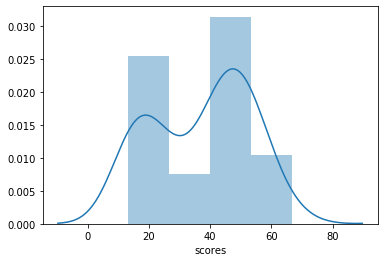

In [18]:
p = sns.distplot(data_50.scores)

In [19]:
klout_50xbar = data_50.scores.mean()
print(klout_50xbar)

37.1147983898


In [20]:
klout_50s = data_50.scores.std()
print(klout_50s)

15.759992555297005
